<a href="https://colab.research.google.com/github/Cristiand056/practicas_IA/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
import kagglehub
import os
import pandas as pd
import numpy as np

path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

archivo_dir_train = os.path.join(path, "train.csv")

datos_train = pd.read_csv(archivo_dir_train)

datos_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [144]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [145]:
datos_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

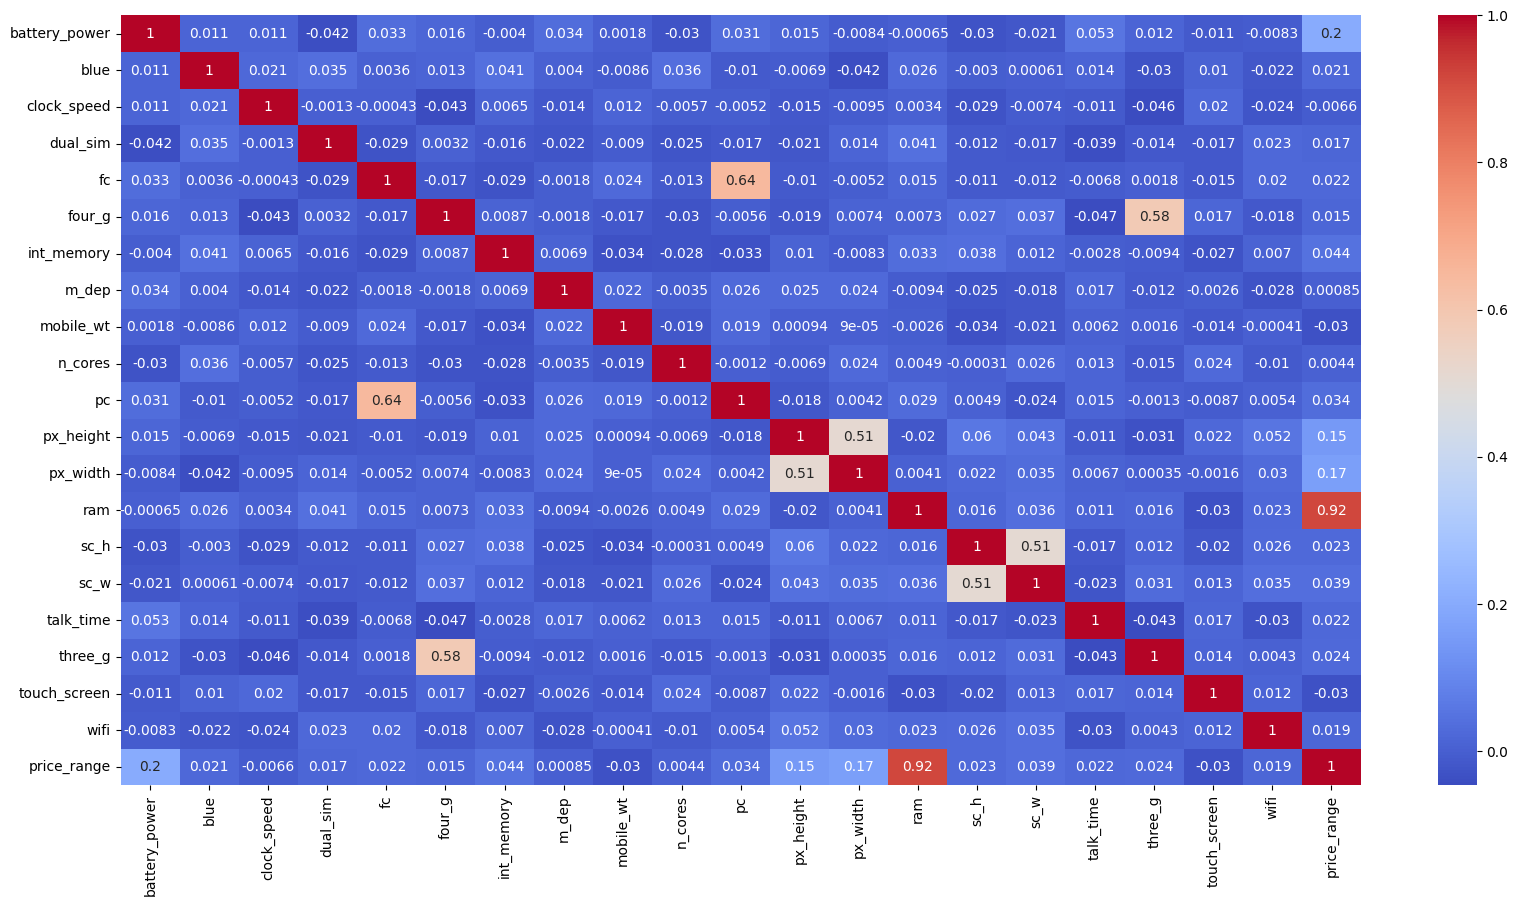

In [147]:
plt.figure(figsize=(20, 10))
sns.heatmap(datos_train.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 2000x1000 with 0 Axes>

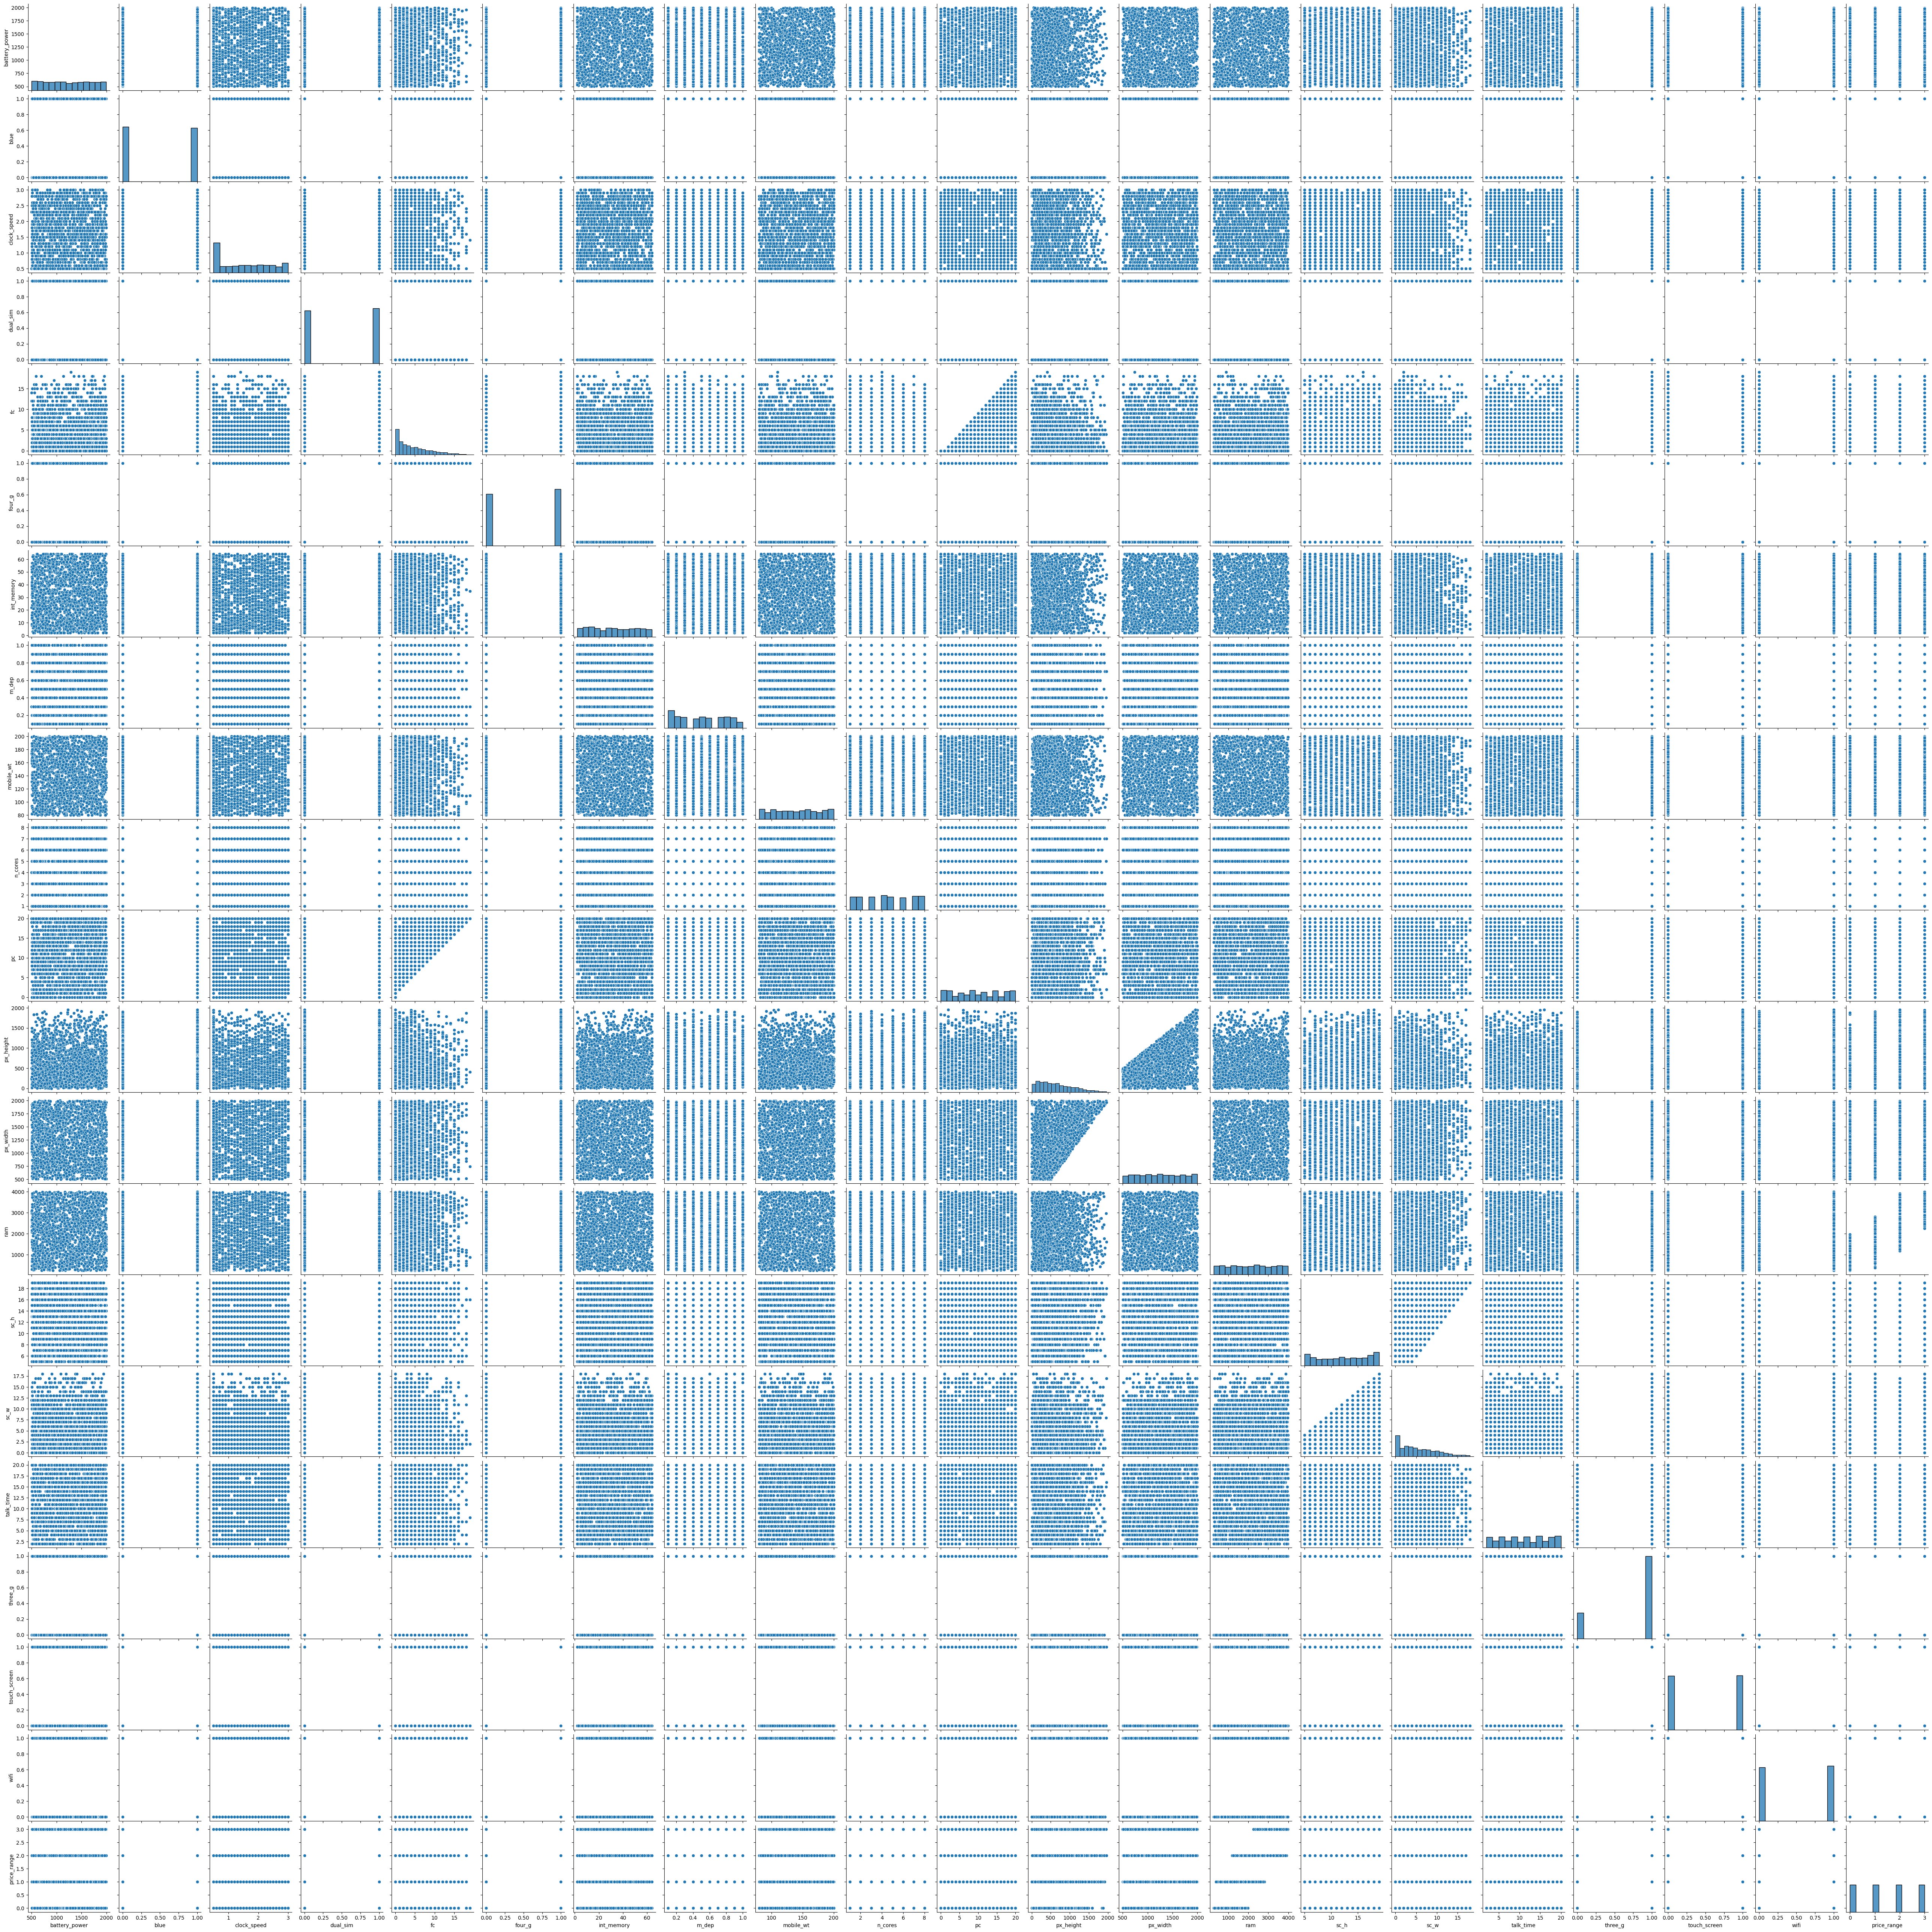

In [148]:
plt.figure(figsize=(20, 10))
sns.pairplot(data=datos_train)
plt.show()

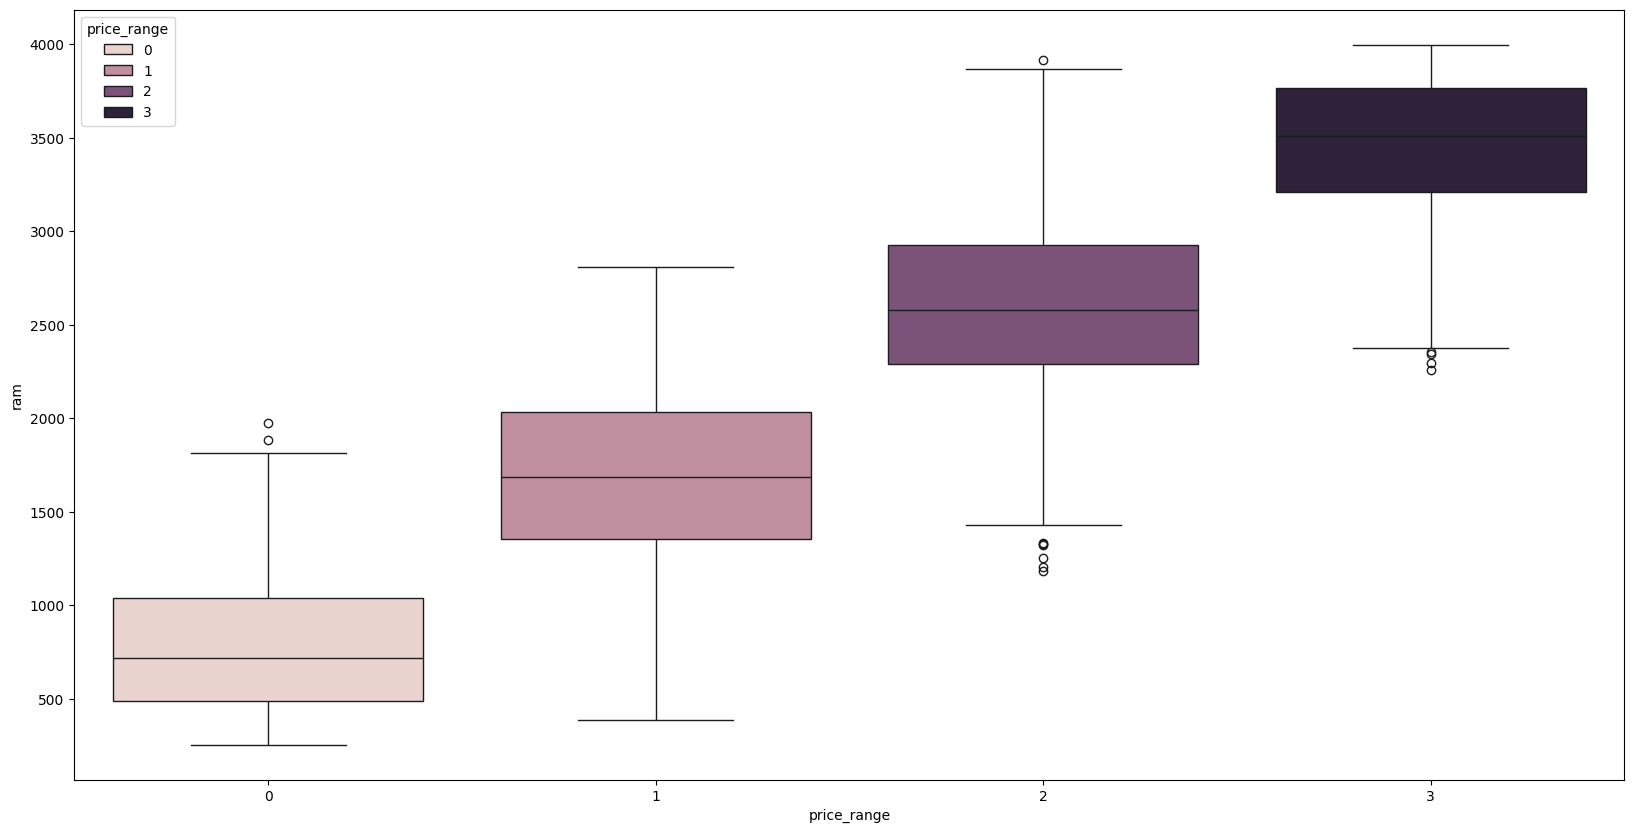

In [149]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=datos_train, x='price_range', y='ram', hue='price_range')
plt.show()

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X = datos_train.drop('price_range', axis=1)
y = datos_train['price_range']

In [152]:
print(y.unique())

[1 2 3 0]


In [153]:
print(X.isna().sum())
print(np.isinf(X).sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Estandarización**

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score, ConfusionMatrixDisplay

##**KNN**

In [157]:
from sklearn.neighbors import KNeighborsClassifier

kk = KNeighborsClassifier(n_neighbors=15, weights='uniform')
kk.fit(X_train_scaled, y_train)

print(kk.score(X_test_scaled, y_test))

y_pred_kk = kk.predict(X_test_scaled)

print(f'Accuracy: {kk.score(X_test_scaled, y_test)}')
print(f'R2: {r2_score(y_test, y_pred_kk)}')
print("\nclassification_report: \n")
print(classification_report(y_test, y_pred_kk))

0.5525
Accuracy: 0.5525
R2: 0.5540544971636554

classification_report: 

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       105
           1       0.39      0.41      0.40        91
           2       0.37      0.41      0.39        92
           3       0.76      0.58      0.66       112

    accuracy                           0.55       400
   macro avg       0.55      0.54      0.54       400
weighted avg       0.57      0.55      0.56       400



##**Decision tree classifier**

In [158]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=6, random_state=42)
modelo_arbol.fit(X_train, y_train)

y_pred_arbol = modelo_arbol.predict(X_test)

print(f'Accuracy: {modelo_arbol.score(X_test, y_test)}')
print(f'R2: {r2_score(y_test, y_pred_arbol)}')
print("\nclassification_report: \n")
print(classification_report(y_test, y_pred_arbol))

Accuracy: 0.805
R2: 0.8538497931880887

classification_report: 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.70      0.86      0.77        91
           2       0.68      0.70      0.69        92
           3       0.91      0.80      0.85       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.82      0.81      0.81       400



##**Random forest classifier**

In [159]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print(f'Accuracy: {modelo_rf.score(X_test, y_test)}')
print(f'R2: {r2_score(y_test, y_pred_rf)}')
print("\nclassification_report: \n")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8625
R2: 0.896945366991601

classification_report: 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.84      0.78      0.81        91
           2       0.75      0.79      0.77        92
           3       0.92      0.89      0.90       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



##**Regresion logistíca**

In [160]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1500, random_state=42)
modelo_log.fit(X_train, y_train)

y_pred_log = modelo_log.predict(X_test)

print(f'Accuracy: {modelo_log.score(X_test, y_test)}')
print(f'R2: {r2_score(y_test, y_pred_log)}')
print("\nclassification_report: \n")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.735
R2: 0.7732798073815224

classification_report: 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       105
           1       0.64      0.67      0.66        91
           2       0.59      0.61      0.60        92
           3       0.79      0.79      0.79       112

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400



##**Regresión logaritmica**

In [161]:
from sklearn.linear_model import LinearRegression

num_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
              'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
X_log = X.copy()

for col in num_columns:
  X_log[col] = np.log(X_log[col] + 1)



X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_log_train, y_log_train)

y_pred_lin_reg = log_reg.predict(X_log_test)

print(f'Accuracy: {log_reg.score(X_log_test, y_log_test)}')
print(f'R2: {r2_score(y_log_test, y_pred_lin_reg)}')
print("\nclassification_report: \n")
print(classification_report(y_log_test, y_pred_lin_reg))

Accuracy: 0.6025
R2: 0.5896551885665569

classification_report: 

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       105
           1       0.51      0.52      0.51        91
           2       0.41      0.48      0.44        92
           3       0.65      0.62      0.64       112

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.60       400
weighted avg       0.62      0.60      0.61       400



##Variables objetivo balanceo

In [170]:
datos_obj = datos_train['price_range'].value_counts()
datos_obj

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

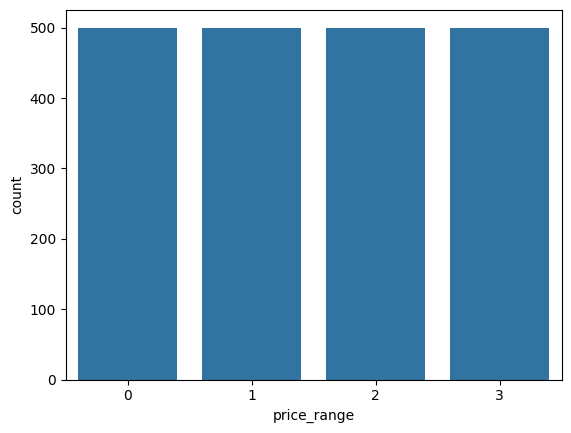

In [163]:
sns.barplot(data=datos_obj, x=datos_obj.index.get_level_values(0), y=datos_obj.values)
plt.show()

In [164]:
datos_obj = datos_train['price_range'].value_counts(normalize=True) * 100
datos_obj = datos_obj.round(2)
datos_obj

price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64

<p>No es necesario balancear las variables ya que estan en equilibrio

In [168]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultado = cross_validate(modelo_rf, X, y, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1'])

cv_resultado

{'fit_time': array([0.49524879, 0.48697901, 0.62968826, 0.43443179, 0.59795642]),
 'score_time': array([0.03671741, 0.03772497, 0.02872252, 0.03078508, 0.05879855]),
 'test_accuracy': array([0.82  , 0.875 , 0.8175, 0.7975, 0.85  ]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_f1': array([nan, nan, nan, nan, nan])}

In [171]:
param_grid = {
    'n_estimators': [100, 300, 450],
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [2, 5, 8]
}

In [174]:
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 15, 25], 'max_leaf_nodes': [2, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 450]},
             scoring='accuracy')

In [175]:
grid_search.best_params_

{'max_depth': 15,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 450}

#**Modleo final**

In [186]:
modelo_rf = RandomForestClassifier(n_estimators=450, max_depth=15, max_leaf_nodes=8, min_samples_split=5 , class_weight='balanced',random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

print(f'Accuracy: {modelo_rf.score(X_test, y_test)}')
print(f'R2: {r2_score(y_test, y_pred_rf)}')
print("\nclassification_report: \n")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.845
R2: 0.8838293227905321

classification_report: 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       105
           1       0.79      0.75      0.77        91
           2       0.74      0.72      0.73        92
           3       0.90      0.91      0.91       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [188]:
confusion_matrix(y_test, y_pred_rf)

array([[102,   3,   0,   0],
       [ 10,  68,  13,   0],
       [  0,  15,  66,  11],
       [  0,   0,  10, 102]])

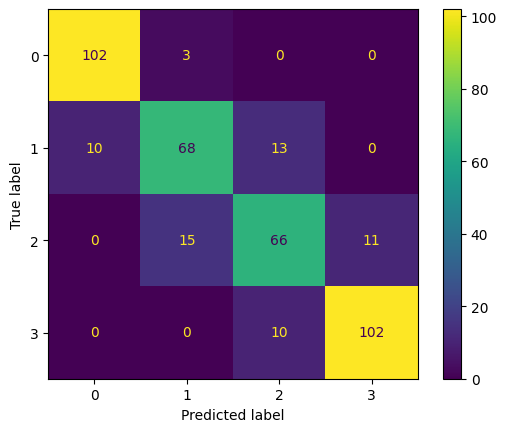

In [189]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=modelo_rf.classes_)
visualizacion.plot()
plt.show()

#**Guardar al champion**

In [190]:
import joblib

joblib.dump(modelo_rf, 'modelo_rf.joblib')

['modelo_rf.joblib']